# Example of 2D plot with Curve_fit

https://stackoverflow.com/questions/43202089/python-scipys-curve-fit-for-nxm-arrays



- blabla

The goal is to express the 2D function as a 1D function: g(x, y, ...) --> f(xy, ...)

Converting the coordinate pair (x, y) into a single number xy may seem tricky at first. But it's actually quite simple. Just enumerate all data points and you have a single number that uniquely defines each coordinate pair. The fitted function simply has to reconstruct the original coordinates, do it's calculations and return the result.

Example that fits a 2D linear gradient in a 20x10 image:



In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

## The data (noisy)

In [2]:
n, m = 10, 20

# noisy example data
x = np.arange(m).reshape(1, m)
y = np.arange(n).reshape(n, 1)
z = x + y * 2 + np.random.randn(n, m) * 3

In [3]:
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19]])

In [4]:
y

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [5]:
z.shape

(10, 20)

In [6]:
z

array([[ 0.23888341,  0.3414733 , -1.43615056, -1.59187941,  4.86235255,
        10.17251941,  2.21358546,  5.17265354, 13.14228146,  6.90297317,
        12.77357699, 12.31820871, 15.61303551, 15.47296195, 12.62859095,
        12.1848049 , 16.58222769, 18.9268223 , 21.82378575, 17.8860239 ],
       [ 3.48036543,  3.03374082,  5.55355209, -1.34836363,  7.56096269,
         5.33993411,  9.15055037,  8.79727397,  7.63685989, 11.80314022,
        10.84772272, 12.06203137, 17.98582244, 18.88363603, 16.44053373,
        13.18400828, 20.18304971, 20.84683915, 21.7253089 , 21.5190186 ],
       [ 1.61392814,  3.20533329,  0.78686716,  6.6024131 ,  7.1599779 ,
        12.56720936, 12.44193552,  7.1313282 , 17.60992031,  9.72755059,
        13.72507266,  9.83558545, 16.74236017, 19.38507199, 16.17522068,
        20.26978226, 24.18407431, 16.43598704, 19.21618432, 20.72441277],
       [ 7.36506228,  7.31329062,  4.57689421,  5.29397897,  4.88444255,
         9.81847226, 15.4974059 , 17.97946592, 2

In [7]:
print(np.ravel(z).shape)
np.ravel(z)

(200,)


array([ 0.23888341,  0.3414733 , -1.43615056, -1.59187941,  4.86235255,
       10.17251941,  2.21358546,  5.17265354, 13.14228146,  6.90297317,
       12.77357699, 12.31820871, 15.61303551, 15.47296195, 12.62859095,
       12.1848049 , 16.58222769, 18.9268223 , 21.82378575, 17.8860239 ,
        3.48036543,  3.03374082,  5.55355209, -1.34836363,  7.56096269,
        5.33993411,  9.15055037,  8.79727397,  7.63685989, 11.80314022,
       10.84772272, 12.06203137, 17.98582244, 18.88363603, 16.44053373,
       13.18400828, 20.18304971, 20.84683915, 21.7253089 , 21.5190186 ,
        1.61392814,  3.20533329,  0.78686716,  6.6024131 ,  7.1599779 ,
       12.56720936, 12.44193552,  7.1313282 , 17.60992031,  9.72755059,
       13.72507266,  9.83558545, 16.74236017, 19.38507199, 16.17522068,
       20.26978226, 24.18407431, 16.43598704, 19.21618432, 20.72441277,
        7.36506228,  7.31329062,  4.57689421,  5.29397897,  4.88444255,
        9.81847226, 15.4974059 , 17.97946592, 20.14824165, 15.43

In [8]:
def f(xy, a, b):
    """
    xy is the 1D array of the indexes
    output of the same size of the xy (the z values estimated by the function model
    """
    i = xy // m  # reconstruct y coordinates from the xy indexes
    j = xy % m  # reconstruct x coordinates from the xy indexes
    out = i * a + j * b
    return out

# More or less xy becomes the index of the data

In [9]:
xy = np.arange(z.size)  # 0 is the top left pixel and 199 is the top right pixel
xy

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [10]:
f(xy,0,0).shape

(200,)

## Do the fit

In [11]:
res = sp.optimize.curve_fit(f, xy, np.ravel(z))

z_est = f(xy, *res[0])
z_est2d = z_est.reshape(n, m)

## Plot

Text(0.5, 0, 'fitted')

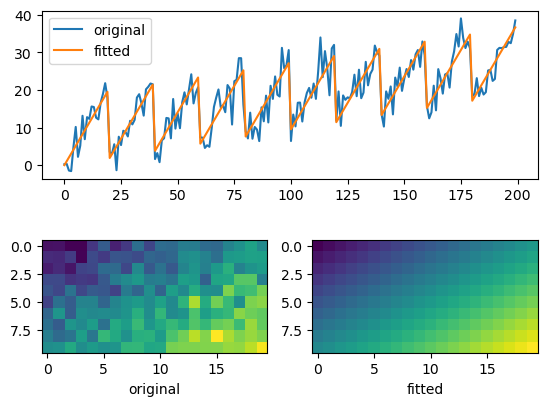

In [12]:
plt.subplot(2, 1, 1)
plt.plot(np.ravel(z), label='original')
plt.plot(z_est, label='fitted')
plt.legend()


plt.subplot(2, 2, 3)
plt.imshow(z)
plt.xlabel('original')

plt.subplot(2, 2, 4)
plt.imshow(z_est2d)
plt.xlabel('fitted')